In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sanfranciso-crime-dataset/Police_Department_Incidents_-_Previous_Year__2016_.csv


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df= pd.read_csv('/kaggle/input/sanfranciso-crime-dataset/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [45]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [47]:
df.shape

(150500, 13)

In [48]:
df.describe

<bound method NDFrame.describe of         IncidntNum        Category  \
0        120058272     WEAPON LAWS   
1        120058272     WEAPON LAWS   
2        141059263        WARRANTS   
3        160013662    NON-CRIMINAL   
4        160002740    NON-CRIMINAL   
...            ...             ...   
150495   161061000         ASSAULT   
150496   176000742    NON-CRIMINAL   
150497   176000758   LARCENY/THEFT   
150498   176000764   LARCENY/THEFT   
150499   179002868  OTHER OFFENSES   

                                                 Descript DayOfWeek  \
0                               POSS OF PROHIBITED WEAPON    Friday   
1          FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE    Friday   
2                                          WARRANT ARREST    Monday   
3                                           LOST PROPERTY   Tuesday   
4                                           LOST PROPERTY    Friday   
...                                                   ...       ...   
150495      

In [49]:
print(df['Category'].unique())

['WEAPON LAWS' 'WARRANTS' 'NON-CRIMINAL' 'ASSAULT' 'OTHER OFFENSES'
 'MISSING PERSON' 'LARCENY/THEFT' 'BURGLARY' 'STOLEN PROPERTY' 'ROBBERY'
 'FRAUD' 'DRUG/NARCOTIC' 'VEHICLE THEFT' 'RECOVERED VEHICLE' 'VANDALISM'
 'ARSON' 'PROSTITUTION' 'SECONDARY CODES' 'SUSPICIOUS OCC' 'DRUNKENNESS'
 'TRESPASS' 'SEX OFFENSES, NON FORCIBLE' 'SEX OFFENSES, FORCIBLE'
 'RUNAWAY' 'KIDNAPPING' 'DISORDERLY CONDUCT' 'DRIVING UNDER THE INFLUENCE'
 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT' 'BRIBERY' 'FAMILY OFFENSES'
 'GAMBLING' 'SUICIDE' 'LIQUOR LAWS' 'EXTORTION' 'LOITERING' 'TREA'
 'BAD CHECKS' 'PORNOGRAPHY/OBSCENE MAT']


In [50]:
# checking if there are any null values

df.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [51]:
# filling the missing value in PdDistrict using the mode values

df['PdDistrict'].fillna(df['PdDistrict'].mode()[0], inplace = True)

df.isnull().any().any()

False

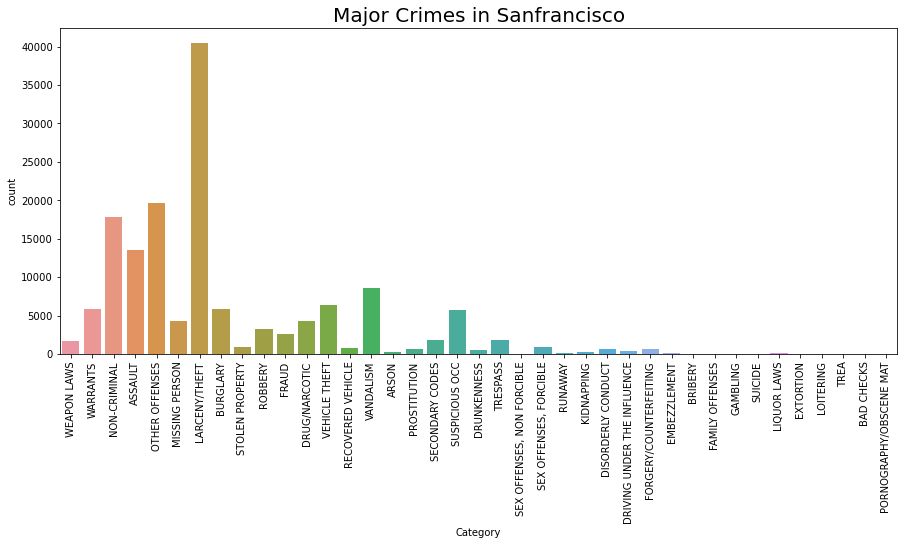

In [52]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Category', data=df)

plt.title('Major Crimes in Sanfrancisco', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

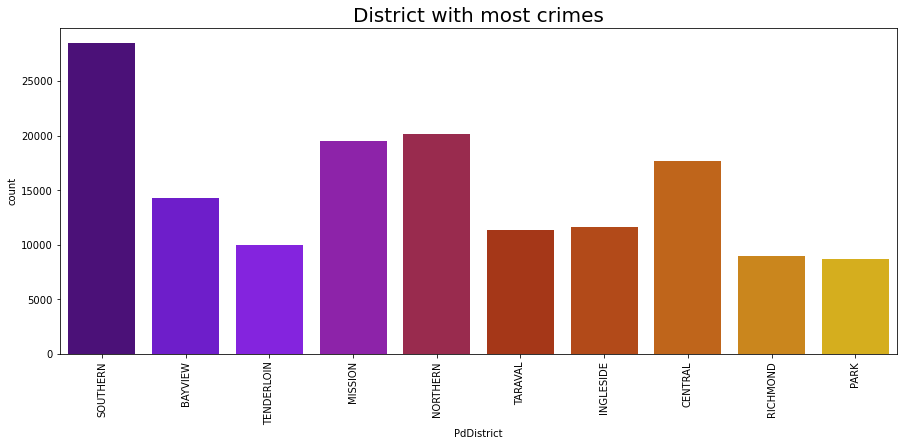

In [53]:
fig_dims = (15,6)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['PdDistrict'],palette = 'gnuplot')
plt.title('District with most crimes', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


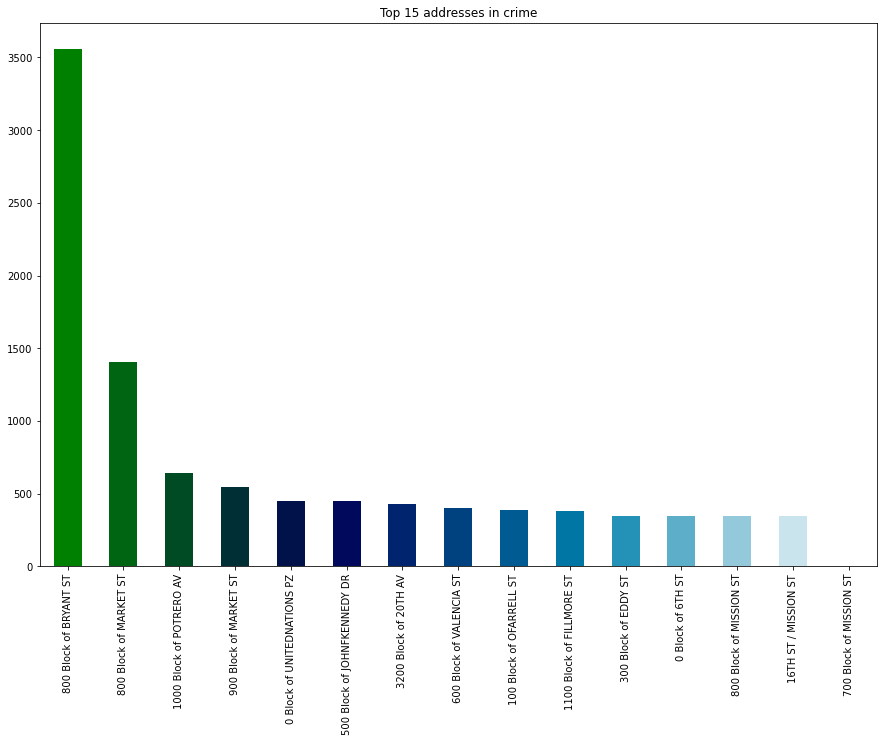

In [54]:
fig, ax = plt.subplots(figsize = (15, 10))

color = plt.cm.ocean(np.linspace(0, 1, 15))
df['Address'].value_counts().head(15).plot.bar(color = color)

plt.title('Top 15 addresses in crime')
plt.xticks(rotation=90)
plt.show()

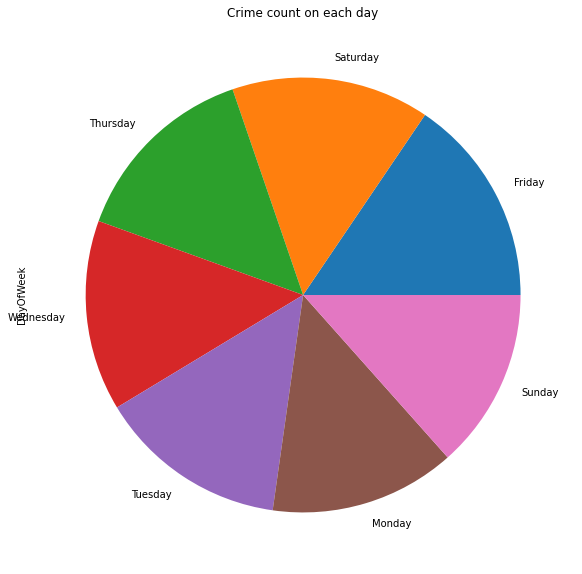

In [55]:
fig, ax = plt.subplots(figsize = (15, 10))


df['DayOfWeek'].value_counts().head(15).plot.pie(explode = (0,0,0,0,0,0,0))

plt.title('Crime count on each day')
plt.xticks(rotation=90)
plt.show()

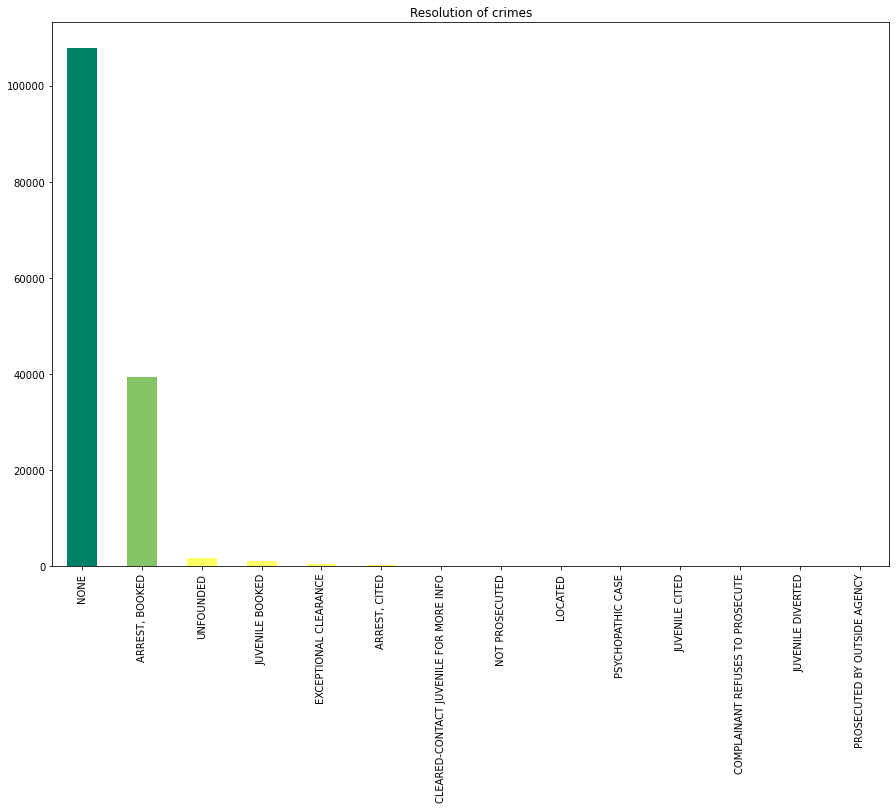

In [56]:
fig, ax = plt.subplots(figsize = (15, 10))

color = plt.cm.summer(np.linspace(0, 10, 20))
df['Resolution'].value_counts().head(15).plot.bar(color = color)

plt.title('Resolution of crimes')
plt.xticks(rotation=90)
plt.show()

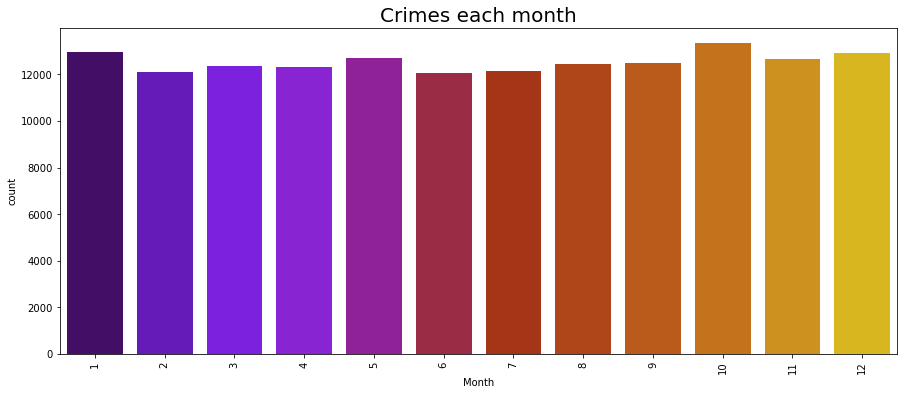

In [57]:
fig_dims = (15,6)
fig,ax = plt.subplots(figsize=fig_dims)

df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

sns.countplot(df['Month'],palette = 'gnuplot')
plt.title('Crimes each month', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

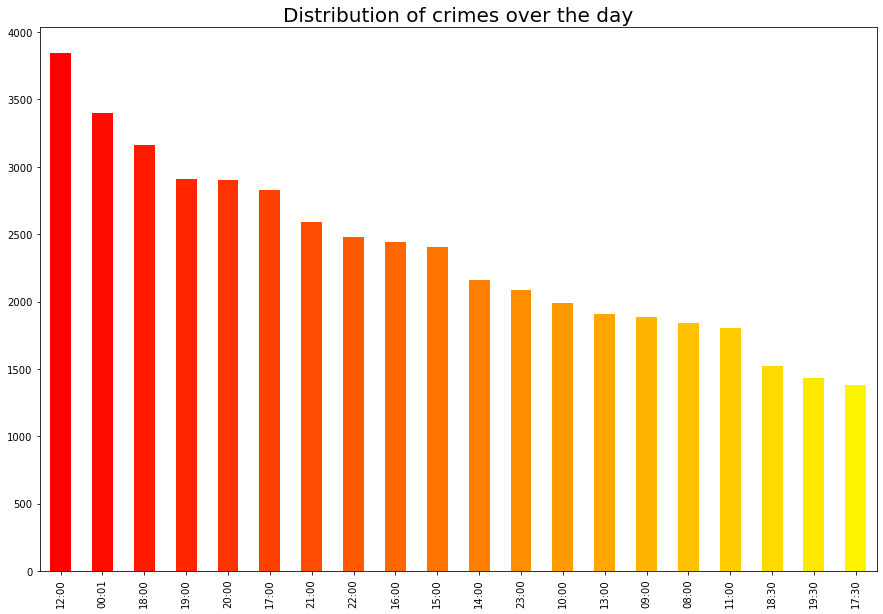

In [58]:
fig, ax = plt.subplots(figsize = (15, 10))

color = plt.cm.autumn(np.linspace(0, 10, 200))
df['Time'].value_counts().head(20).plot.bar(color = color)

plt.title('Distribution of crimes over the day', fontsize =20)
plt.xticks(rotation=90)
plt.show()

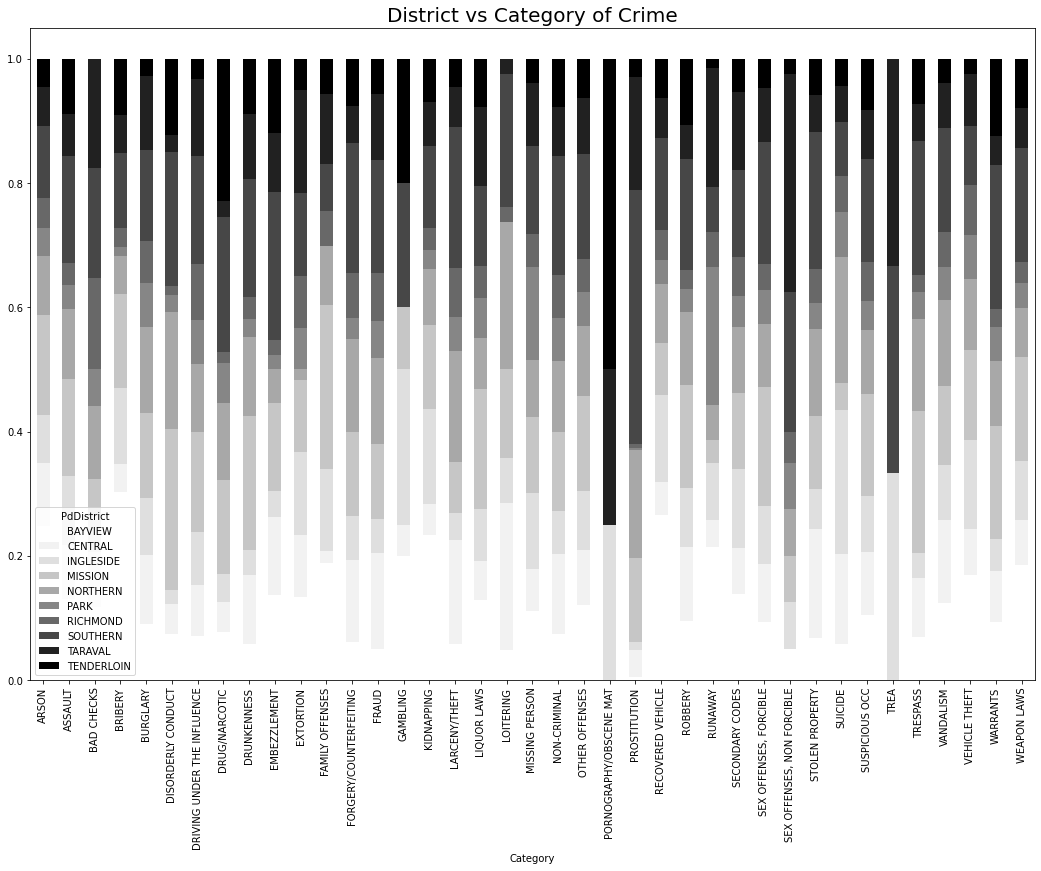

In [59]:
data = pd.crosstab(df['Category'], df['PdDistrict'])
color = plt.cm.Greys(np.linspace(0,1,10))
data.div(data.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20)
plt.show()

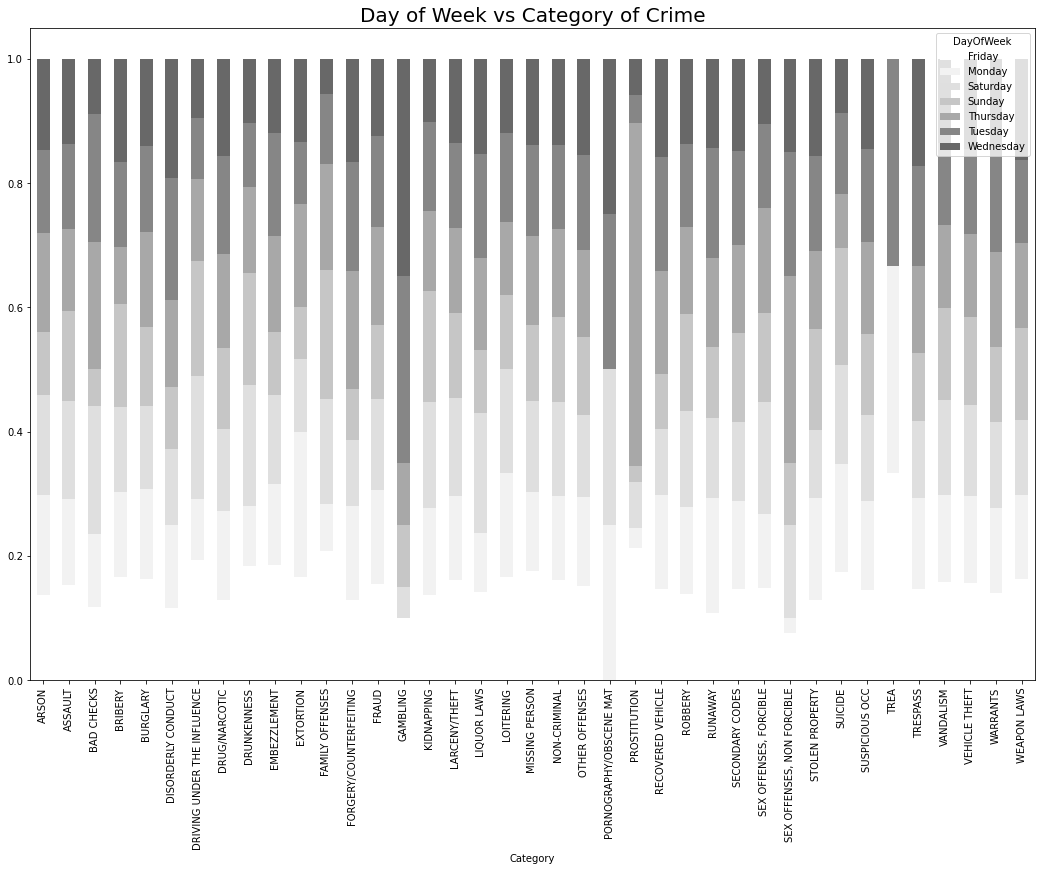

In [60]:
data = pd.crosstab(df['Category'], df['DayOfWeek'])
color = plt.cm.Greys(np.linspace(0,1,10))
data.div(data.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('Day of Week vs Category of Crime', fontweight = 30, fontsize = 20)
plt.show()

In [61]:
t = df.PdDistrict.value_counts()
table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])
table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28446
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303
